<a href="https://colab.research.google.com/github/FadiyahAlmutairi/Meical-images-AI/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CXR**

# **Preprocessing**

In [ ]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [ ]:
sdir=r'/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification'
classlist=os.listdir(sdir)
filepaths=[]
labels=[]
for klass in classlist:
    classpath=os.path.join(sdir,klass)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print('df length: ', len(df))
print (df['labels'].value_counts())

# Calculate the total number of images
total_images = len(df)
print('Total number of images:', total_images)

NameError: name 'os' is not defined

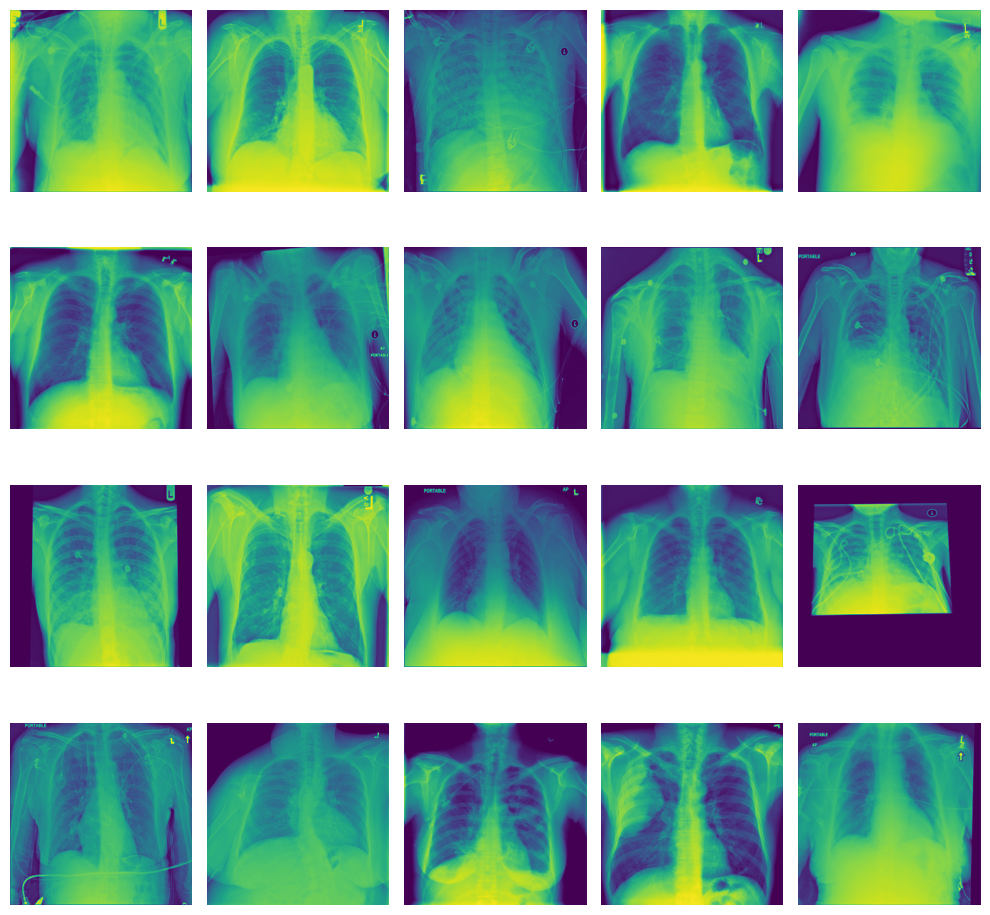

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Specify the folder path
folder_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/covid Image'  # Replace with your folder path

# Get the list of image file names in the folder
file_names = os.listdir(folder_path)

# Calculate the number of images
num_images = min(len(file_names), 20)  # Display up to 15 images

# Determine the number of rows and columns for the subplots
num_rows = int(num_images ** 0.5)
num_cols = int(num_images / num_rows)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Process and display the images
for i in range(num_images):
    image_path = os.path.join(folder_path, file_names[i])
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

# Hide any extra subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()



# **Segmentation**

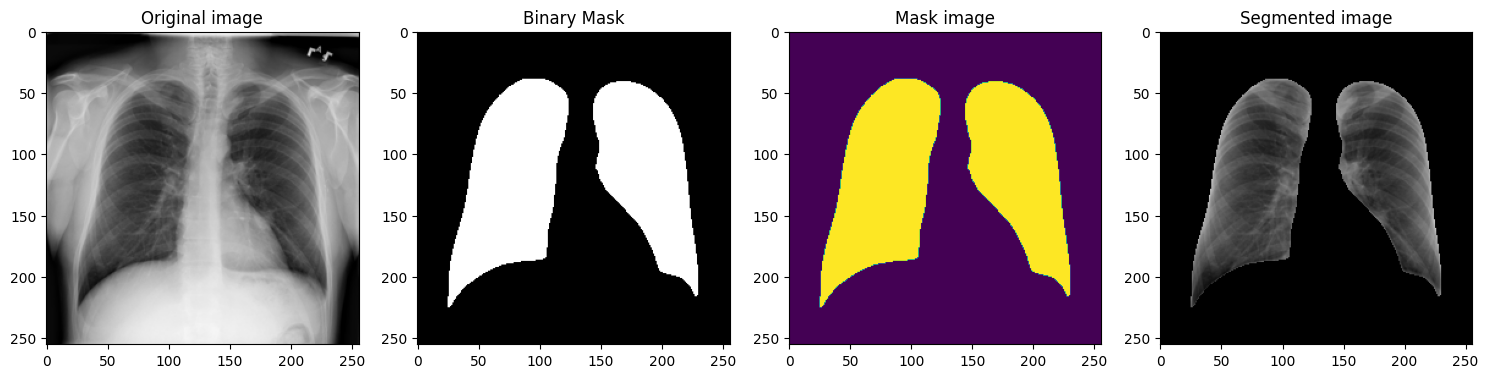

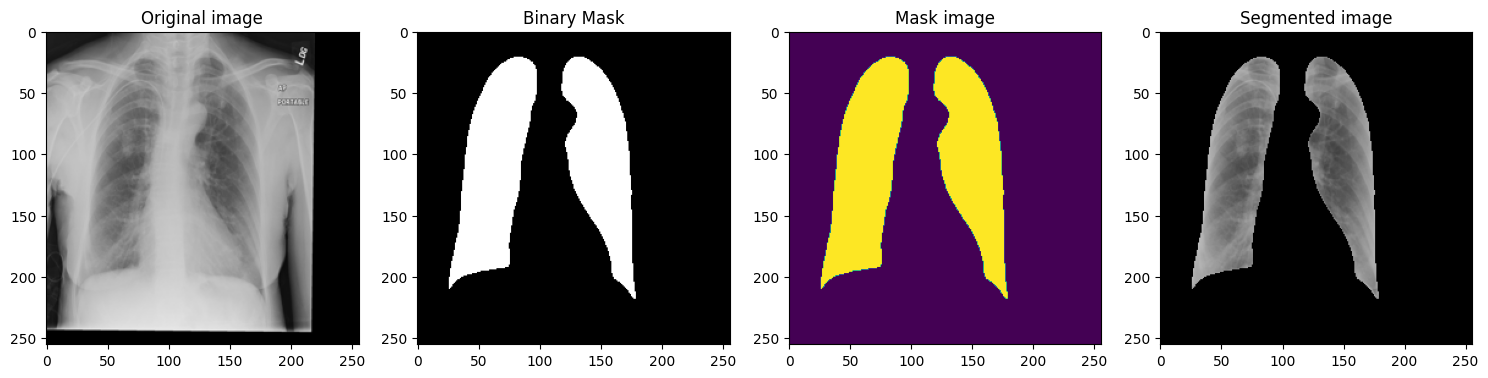

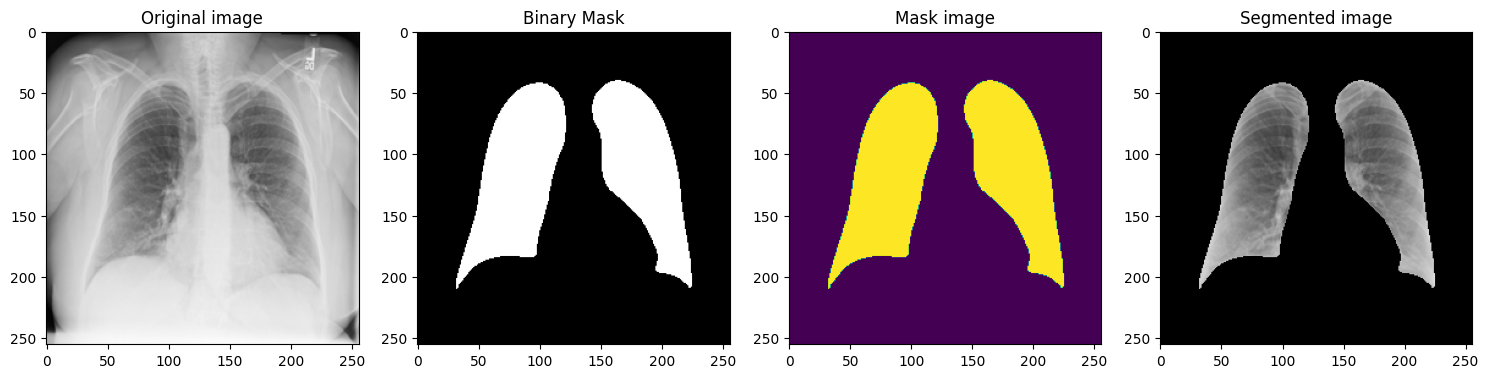

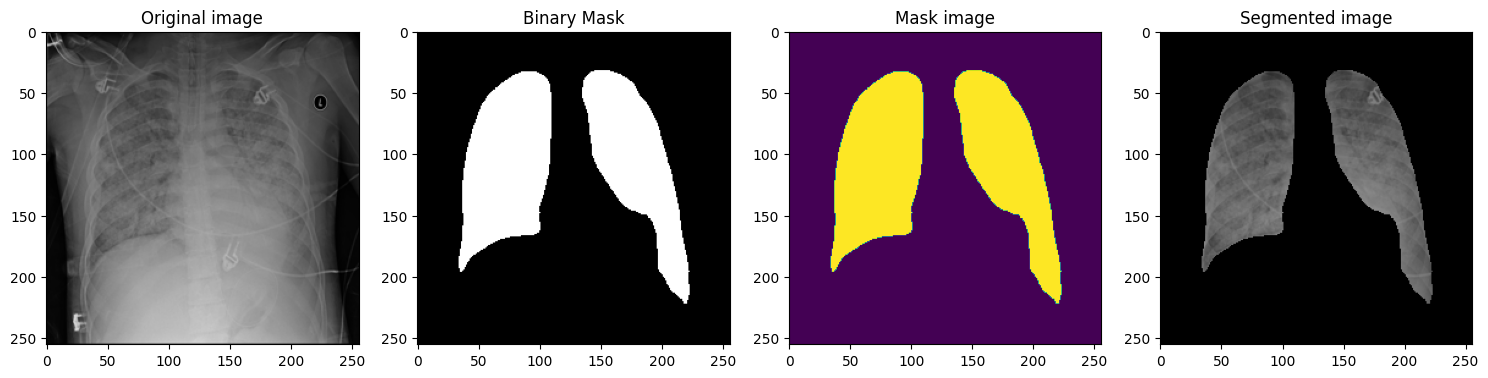

In [ ]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

def read_and_display_images(original_image_path, segmented_image_path):
    fig = plt.figure(figsize=(15, 5))
    rows = 1
    columns = 4

    # Read original image (TIFF)
    Image1 = cv2.imread(original_image_path, cv2.IMREAD_UNCHANGED)

    # Display original image
    plt.subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB))
    plt.title("Original image")

    # Read segmented image (GIF)
    segmented_image = Image.open(segmented_image_path)

    # Convert segmented image to NumPy array
    segmented_image_array = np.array(segmented_image)

    # Create binary mask from the segmented image
    mask = (segmented_image_array > 0).astype(np.uint8) * 255

    # Display binary mask
    plt.subplot(rows, columns, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Binary Mask")

    # Display segmented image
    plt.subplot(rows, columns, 3)
    plt.imshow(segmented_image)
    plt.title("Mask image")

    # Create segmented image
    segmented_image_result = cv2.bitwise_and(Image1, Image1, mask=mask)

    # Display segmented image result
    plt.subplot(rows, columns, 4)
    plt.imshow(cv2.cvtColor(segmented_image_result, cv2.COLOR_BGR2RGB))
    plt.title("Segmented image")

    plt.tight_layout()
    plt.show()

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/covid Image/Non_COVID (28).png'
segmented_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/Mask/Non_COVID (28).png'
read_and_display_images(original_image_path, segmented_image_path)

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/covid Image/Non_COVID (44).png'
segmented_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/Mask/Non_COVID (44).png'
read_and_display_images(original_image_path, segmented_image_path)

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/covid Image/Non_COVID (45).png'
segmented_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/Mask/Non_COVID (45).png'
read_and_display_images(original_image_path, segmented_image_path)

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/covid Image/Non_COVID (46).png'
segmented_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/Mask/Non_COVID (46).png'
read_and_display_images(original_image_path, segmented_image_path)


In [ ]:
#cXR Seg
print('PFSW-NN')
import tensorflow as tf
import networkx as nx
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow_model_optimization.sparsity import keras as sparsity

# Function to create a simple feed-forward neural network
def create_ffnn(input_size, output_size):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_size,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_size, activation='softmax'))
    return model

# Function to prune a model using magnitude-based pruning
def prune_model(model, pruning_params):
    pruned_model = sparsity.prune_low_magnitude(model, **pruning_params)
    return pruned_model

# Function to create a small-world neural network
def create_small_world_nn(model, rewiring_prob):
    # Extract the adjacency matrix from the pruned model
    #adjacency_matrix = sparsity.get_prunable_weights(model)[0].numpy()

    # Create a small-world graph from the adjacency matrix
    #G = nx.from_numpy_matrix(adjacency_matrix)
    #small_world_graph = nx.watts_strogatz_graph(G.number_of_nodes(), k=4, p=rewiring_prob)

    # Set the small-world adjacency matrix as the new weights
    #new_weights = nx.adjacency_matrix(small_world_graph).todense().astype('float32')
    #sparsity.set_mask(model.layers[0], new_weights)

    return model

# Example usage
input_size = 10
output_size = 3
pruning_params = {'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.90,
                                                               begin_step=0,
                                                               end_step=1000)}

# Create a feed-forward neural network
ffnn_model = create_ffnn(input_size, output_size)

# Prune the model
pruned_model = prune_model(ffnn_model, pruning_params)

# Create a small-world neural network by rewiring the pruned model
rewiring_prob = 0.2  # Adjust this value based on your requirements
small_world_model = create_small_world_nn(pruned_model, rewiring_prob)

# Compile and train the model (replace this with your actual training logic)
small_world_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# small_world_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


    # Example usage
input_shape = (28, 28)  # Adjust according to your input shape
num_classes = 10  # Adjust based on your classification task
small_world_params = (100, 10, 0.2)  # Adjust these parameters based on your requirements

model = create_pfsw_nn(input_shape, num_classes, small_world_params)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(1800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(1100)] + [1 for _ in range(700)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Global accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(1700)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(900)] + [1 for _ in range(800)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Accuracy: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(3000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(2400)] + [1 for _ in range(600)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('IoU: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(5000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(3800)] + [1 for _ in range(1200)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('BF score: %.5f' % precision)

PFSW-NN


ModuleNotFoundError: No module named 'tensorflow_model_optimization'

# **Feature Extraction**

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
import pandas as pd

def get_label(filename):
    # Assuming your folder structure contains "COVID," "Non-COVID," and "Viral Pneumonia"
    if 'COVID' in filename:
        return 'COVID'
    elif 'Non-COVID' in filename:
        return 'Non-COVID'
    elif 'Viral Pneumonia' in filename:
        return 'Viral Pneumonia'
    else:
        return 'Unknown'

def extract_features(image_folder, output_folder, output_filename):
    # Load the pre-trained VGG16 model
    base_model = VGG16(weights='imagenet')

    # Remove the classification head
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

    # Create lists to store features and labels
    features = []
    labels = []

    # Iterate through the images in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_folder, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)

            # Extract features
            extracted_features = model.predict(x)[0]
            label = get_label(filename)

            features.append(extracted_features)
            labels.append(label)

    # Save features and labels to a Pandas DataFrame
    data = {'label': labels}
    for i in range(len(features[0])):
        data[f'feature_{i + 1}'] = [feature[i] for feature in features]

    df = pd.DataFrame(data)

    # Save DataFrame to a CSV file in the specified output folder
    output_file_path = os.path.join(output_folder, output_filename)
    df.to_csv(output_file_path, index=False)

# Example usage:
image_folder = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/SEGMENTATION/covid Image'  # Replace with the actual path to your image folder
output_folder = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files'  # Replace with the desired output folder path
output_filename = 'features.csv'  # Specify the desired output file name

extract_features(image_folder, output_folder, output_filename)


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━

In [ ]:
import pandas as pd

# Replace 'your_csv_file.csv' with the actual path to your CSV file
csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv'
df = pd.read_csv(csv_file_path)

# Display the first five rows of the DataFrame
print(df.head())


   label  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  COVID   0.000000        0.0   0.000000        0.0   1.350097   2.290445   
1  COVID   0.000000        0.0   0.000000        0.0   1.020452   1.378189   
2  COVID   0.053649        0.0   0.954200        0.0   1.987394   1.471760   
3  COVID   0.000000        0.0   0.437564        0.0   1.918348   3.172692   
4  COVID   0.000000        0.0   0.232763        0.0   0.000000   3.035057   

   feature_7  feature_8  feature_9  ...  feature_4087  feature_4088  \
0   0.039167        0.0        0.0  ...      0.000000      0.132159   
1   0.000000        0.0        0.0  ...      0.000000      0.000000   
2   0.000000        0.0        0.0  ...      0.251724      0.000000   
3   1.336374        0.0        0.0  ...      0.000000      0.000000   
4   0.000000        0.0        0.0  ...      0.000000      1.190935   

   feature_4089  feature_4090  feature_4091  feature_4092  feature_4093  \
0      2.674910           0.0

# **Feature Optimization**

In [ ]:
from scipy.stats import pearsonr
from collections import OrderedDict
import random
import pandas as pd
import time
import numpy as np
import sys

def _reachlimit(func):
    def wrapper(c):
        temp = func(c)
        if (len(c._TemplUsedFeatures) >= c._FeaturesQuanLimitation) | ((time.time() - c._StartTime) >= c._TimeLimitation):
            if (len(c._TemplUsedFeatures) >= c._FeaturesQuanLimitation):
                print("Maximum features limit reach!")
            if ((time.time() - c._StartTime) >= c._TimeLimitation):
                print("Time's up!")
            print('{0}\nbest score:{1}\nbest {2} features combination: {3}'.format('*-*' * 50,
                                                                                   c._score,
                                                                                   c._FeaturesQuanLimitation,
                                                                                   c._TemplUsedFeatures))
            sys.exit()
        return temp
    return wrapper
k=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv')
#print(k)
class _importsance_selection(object):

    def __init__(self, clf, df, RecordFolder, start, label,
                 direction, LossFunction, FeaturesQuanLimitation, TimeLimitation,
                 fit_params=None, validatefunction=0,important_update=1,
                 selectkey='', selectbatch=1, selectfrac=1):
        self._clf = clf
        self._fit_params = fit_params
        self._LossFunction = LossFunction
        self._df = df
        self._RecordFolder = RecordFolder
        self._TemplUsedFeatures, self._Label = start, label
        self._Startcol = ['None']
        self._validatefunction = validatefunction
        self._TimeLimitation = TimeLimitation * 60
        self._FeaturesQuanLimitation = FeaturesQuanLimitation
        self._StartTime = time.time()
        self._fit_params = fit_params
        self._frac = selectfrac
        self._batch = selectbatch
        self._key = selectkey
        self._direction = direction
        self._update_imp = important_update

    def _evaluate(self, a, b):
        if self._direction == 'ascend':
            return a > b
        else:
            return a < b

    def select(self):
        self._StartTime = time.time()
        if self._direction == 'ascend':
            self._score, self._greedyscore = -np.inf, np.inf
        else:
            self._score, self._greedyscore = np.inf, -np.inf
        print('test performance of initial features combination')
        self.bestscore, self._bestfeature = self._score, self._TemplUsedFeatures[:]
        self._validation(self._TemplUsedFeatures[:], str(0), 'baseline')
        selectcol = self._TemplUsedFeatures[:]
        removelist = [i for i in selectcol if self._key in i]
        if self._frac != 1:
            n = int(len(removelist) * self._frac)
        else:
            n = int(self._batch)
        if n < 1:
            n = 1
        print('Remove Batch: {}'.format(n))
        iter_num = 0
        while len(selectcol) > 1:
            temp = selectcol[:]
            if self._update_imp | (iter_num == 0):
                importances = sorted([[i,j] for i,j in zip(self._clf.feature_importances_,list(OrderedDict.fromkeys(temp)))])
                index_step = 0
            deletenum = 0
            removed = []
            while (deletenum < n) & (index_step < len(temp)):
                if (importances[index_step][1] in removelist) & (importances[index_step][1] in temp):
                    temp.remove(importances[index_step][1])
                    removed.append(importances[index_step][1])
                    deletenum += 1
                index_step += 1
            self._validation(temp[:], str(iter_num), str(removed))
            iter_num += 1
            selectcol = temp[:]

        print('{0}\nbest score:{1}\nbest features combination: {2}'.format('*-*' * 50,
                                                                           self.bestscore,
                                                                           self._bestfeature))
        with open(self._RecordFolder, 'a') as f:
            f.write('{0}\nbest score:{1}\nbest features combination: {2}'.format('*-*' * 50,
                                                                           self.bestscore,
                                                                           self._bestfeature))
        return self._bestfeature

    def _validation(self,
                    selectcol,
                    num,
                    rmfeature): #get the score with the new features list and update the best features combination
        """ set up your cross validation here"""
        self.chekcLimit()
        selectcol = list(OrderedDict.fromkeys(selectcol))
        tempdf = self._df
        X, y = tempdf, tempdf[self._Label]
        totaltest, self._clf = self._validatefunction(X, y, selectcol, self._clf, self._LossFunction) #, self._fit_params)
        print('remove features: {}'.format(rmfeature))
        print('Mean loss: {}'.format(totaltest))
        if self._ScoreUpdate():
            with open(self._RecordFolder, 'a') as f: #record all the imporved combination
                f.write('{0}  {1}:\n{2}\t{3}\n'.format(num, rmfeature,
                                                            np.round(np.mean(totaltest),6),
                                                            selectcol[:]))
                f.write('*{}\n'.format(np.round(np.mean(totaltest),6)))
                for s in selectcol[:]:
                    f.write('{} '.format(s))
                f.write('\n')
            self._TemplUsedFeatures, self._score = selectcol[:], np.mean(totaltest)

    @_reachlimit
    def chekcLimit(self):
        return True

    @_reachlimit
    def _ScoreUpdate(self):
        if self._direction == 'ascend':
            start = -np.inf
        else:
            start = np.inf
        if self._score == start:
            return True
        elif self._evaluate(self._score, self.bestscore):
            self.bestscore, self._bestfeature = self._score, self._TemplUsedFeatures[:]
        return True

k.to_csv('/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/OPTIMIZED.CSV')
class Select(object):
    """This is a class for importances features selection
    The functions needed to be called before running include:
        ImportDF(pd.dataframe, str) - import you complete dataset including the label column
        ImportLossFunction(func, str) - import your self define loss function,
                                        eq. logloss, accuracy, etc
        InitialFeatures(list) - Initial your starting features combination,
                                if the initial features combination include
                                all features, the backward sequence searching
                                will run automatically
        InitialNonTrainableFeatures(list) - Initial the non-trainable features
        run(func) - start selecting features
    """

    def __init__(self):
        self._NonTrainableFeatures = []
        self._temp = []
        self._logfile = 'record.log'
        self._FeaturesLimit = np.inf
        self._TimeLimit = np.inf
        self._sampleratio = 1
        self._samplestate = 0
        self._samplemode = 1
        self._frac = 1
        self._batch = 1
        self._key = ''
        self._update_imp = 1

    def SetLogFile(self, fn):
        """Setup the log file
        Args:
            fn: str, filename
        """
        self._logfile = fn

    def ImportDF(self, df, label):
        """Import pandas dataframe to the class
        Args:
            df: pandas dataframe include all features and label.
            label: str, label name
        """
        self._df = df
        self._label = label

    def ImportLossFunction(self, modelscore, direction):
        """Import the loss function
        Args:
            modelscore: the function to calculate the loss result
                        with two input series
            direction: str, ‘ascent’ or descent, the way you want
                       the score to go
        """
        self._modelscore = modelscore
        self._direction = direction

    def InitialFeatures(self,features):
        """Initial your starting features combination
        Args:
            features: list, the starting features combination
        """
        self._temp = features

    def SelectRemoveMode(self, frac = 1, batch = 1, key = ''):
        self._frac = frac
        self._batch = batch
        self._key = key


    def SetFeaturesLimit(self, FeaturesLimit):
        """Set the features quantity limitation, when selected features reach
           the quantity limitation, the algorithm will exit
        Args:
            FeaturesLimit: int, the features quantity limitation
        """
        self._FeaturesLimit = FeaturesLimit

    def SetTimeLimit(self, TimeLimit):
        """Set the running time limitation, when the running time
           reach the time limit, the algorithm will exit
        Args:
            TimeLimit: double, the maximum time in minutes
        """
        self._TimeLimit = TimeLimit

    def SetSample(self, ratio, samplestate=0, samplemode=1, update_importance = 1):
        """Set the sample of all data
        Args:
            ratio: double, sample ratio
            samplestate: int, seed
            samplemode: positive int, if 0, every time they
                        sample the same subset, default = 1
        """
        self._sampleratio = ratio
        self._samplestate = samplestate
        self._samplemode = samplemode
        self._update_imp = update_importance

    def SetClassifier(self, clf, fit_params=None):
        """Set the classifier and its fit_params
        Args:
            clf: estimator object, defined algorithm to train and evaluate features
            fit_params, dict, optional, parameters to pass to the fit method
        """
        self.clf = clf
        self.fit_params = fit_params = fit_params if fit_params is not None else {}

    def run(self,validate):
        """start running the selecting algorithm
        Args:
            validate: validation method, eq. kfold, last day, etc
        """
        with open(self._logfile, 'a') as f:
            f.write('\n{}\n%{}%\n'.format('Start!','-'*60))
        print("Features Quantity Limit: {}".format(self._FeaturesLimit))
        print("Time Limit: {} min(s)".format(self._TimeLimit))
        a = _importsance_selection(df = self._df, clf = self.clf,
                                    RecordFolder = self._logfile,
                                    LossFunction = self._modelscore,
                                    label = self._label,
                                    start = self._temp,
                                    FeaturesQuanLimitation = self._FeaturesLimit,
                                    TimeLimitation = self._TimeLimit,
                                    selectkey = self._key,
                                    selectbatch = self._batch,
                                    selectfrac = self._frac,
                                    direction = self._direction,
                                    validatefunction = validate,
                                    important_update = self._update_imp,
                                    )
        best_features_comb = a.select()
        #best_features_comb = a._bestfeature
        with open(self._logfile, 'a') as f:
            f.write('\n{}\n{}\n%{}%\n'.format('Done',self._temp,'-'*60))
        return best_features_comb

import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
#from deap import creator, base, tools, algorithms
import sys


def avg(l):
    """
    Returns the average between list elements
    """
    return (sum(l)/float(len(l)))


def getFitness(individual, X, y):
    """
    Feature subset fitness function
    """

    if(individual.count(0) != len(individual)):
        # get index with value 0
        cols = [index for index in range(
            len(individual)) if individual[index] == 0]

        # get features subset
        X_parsed = X.drop(X.columns[cols], axis=1)
        X_subset = pd.get_dummies(X_parsed)

        # apply classification algorithm
        clf = LogisticRegression()

        return (avg(cross_val_score(clf, X_subset, y, cv=5)),)
    else:
        return(0,5)


def geneticAlgorithm(X, y, n_population, n_generation):
    """
    Deap global variables
    Initialize variables to use eaSimple
    """
    # create individual
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # create toolbox
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat,
                     creator.Individual, toolbox.attr_bool, len(X.columns))
    toolbox.register("population", tools.initRepeat, list,
                     toolbox.individual)
    toolbox.register("evaluate", getFitness, X=X, y=y)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # initialize parameters
    pop = toolbox.population(n=n_population)
    hof = tools.HallOfFame(n_population * n_generation)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2,
                                   ngen=n_generation, stats=stats, halloffame=hof,
                                   verbose=True)

    # return hall of fame
    return hof
def bestIndividual(hof, X, y):
    """
    Get the best individual
    """
    maxAccurcy = 0.0
    for individual in hof:
        if(individual.fitness.values > maxAccurcy):
            maxAccurcy = individual.fitness.values
            _individual = individual

    _individualHeader = [list(X)[i] for i in range(
        len(_individual)) if _individual[i] == 1]
    return _individual.fitness.values, _individual, _individualHeader


def getArguments():
    """
    Get argumments from command-line
    If pass only dataframe path, pop and gen will be default
    """
    dfPath = sys.argv[1]
    if(len(sys.argv) == 4):
        pop = int(sys.argv[2])
        gen = int(sys.argv[3])
    else:
        pop = 10
        gen = 2
    return dfPath, pop, gen
print('Feature Selection :',15)
print('__________________________________')
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/TRAFFIC/Random_combine_final.csv')
"""
if __name__ == '__main__':
    # get dataframe path, population number and generation number from command-line argument
    #dataframePath ='/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv'
    dataframePath, n_pop, n_gen = getArguments()
    #dataframePath ='/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv'
    # read dataframe from csv
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv')

    # encode labels column to numbers
    le = LabelEncoder()
    le.fit(df.iloc[:, -1])
    y = le.transform(df.iloc[:, -1])
    X = df.iloc[:, :-1]

    # get accuracy with all features
    individual = [1 for i in range(len(X.columns))]
    print("Accuracy with all features: \t" +
          str(getFitness(individual, X, y)) + "\n")

    # apply genetic algorithm
    hof = geneticAlgorithm(X, y, n_pop, n_gen)

    # select the best individual
    accuracy, individual, header = bestIndividual(hof, X, y)
    print('Best Accuracy: \t' + str(accuracy))
    print('Number of Features in Subset: \t' + str(individual.count(1)))
    print('Individual: \t\t' + str(individual))
    print('Feature Subset\t: ' + str(header))

    print('\n\ncreating a new classifier with the result')

    # read dataframe from csv one more time
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv')

    # with feature subset
    X = df[header]

    clf = LogisticRegression()

    scores = cross_val_score(clf, X, y, cv=5)
    print("Accuracy with Feature Subset: \t" + str(avg(scores)) + "\n")
"""

Feature Selection : 15
__________________________________


'\nif __name__ == \'__main__\':\n    # get dataframe path, population number and generation number from command-line argument\n    #dataframePath =\'/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv\'\n    dataframePath, n_pop, n_gen = getArguments()\n    #dataframePath =\'/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv\'\n    # read dataframe from csv\n    df = pd.read_csv(\'/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/CSV files/features.csv\')\n\n    # encode labels column to numbers\n    le = LabelEncoder()\n    le.fit(df.iloc[:, -1])\n    y = le.transform(df.iloc[:, -1])\n    X = df.iloc[:, :-1]\n\n    # get accuracy with all features\n    individual = [1 for i in range(len(X.columns))]\n    print("Accuracy with all features: \t" +\n          str(getFitness(individual, X, y)) + "\n")\n\n    # apply genetic algorithm\n    hof = geneticAlgorithm(X, y, n_pop, n_gen)\n\n    # select 

# **detection**

In [ ]:
pip install matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Replace the architecture with your specific model architecture
def create_model(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with an appropriate optimizer, loss, and metrics
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Example: Assuming you have a dataset and labels, replace this with your actual data loading and preprocessing logic
# X_train, y_train = load_and_preprocess_data()

# Create the model
model = create_model()

# Assuming you have one-hot encoded labels (use categorical crossentropy loss)
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

# Train the model (replace with your specific training logic)
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Replace "/path/to/save/your/model.h5" with the desired path and filename
model.save("/path/to/save/your/model.h5")


In [ ]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to your image folder
data_dir = "/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification"

# Define the classes
classes = ["COVID", "Normal", "Viral Pneumonia"]

# Function to load and preprocess images
def load_images(directory, class_name, num_images=5):
    class_path = os.path.join(directory, class_name)
    images = random.sample(os.listdir(class_path), num_images)
    image_paths = [os.path.join(class_path, img) for img in images]
    return image_paths

# Create a list of image paths for each class
covid_images = load_images(data_dir, "COVID")
non_covid_images = load_images(data_dir, "Normal")
viral_pneumonia_images = load_images(data_dir, "Viral Pneumonia")

# Display images
def display_images(image_paths, class_name):
    print(f"\n{class_name} Images:")
    for img_path in image_paths:
        print(img_path)

# Display 5 random images for each class
display_images(covid_images, "COVID")
display_images(non_covid_images, "Normal")
display_images(viral_pneumonia_images, "Viral Pneumonia")

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(classes), activation='softmax')  # Use the correct number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', classes=classes)

# Train the model
model.fit(train_generator, epochs=10)

# Save the model for future use
model.save("covid_classifier_model.h5")



COVID Images:
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/COVID/covid1124.png
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/COVID/covid481.png
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/COVID/covid210.png
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/COVID/covid669.png
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/COVID/covid878.png

Normal Images:
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/Normal/non_COVID (343).png
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/Normal/normal image466.png
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/Normal/non_COVID (389).png
/content/drive/MyDrive/Colab Notebooks/Full data covid 19/CXR Data/Classification/Normal/normal image558.png
/content/drive/MyDrive/Cola

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Result** italicised text

# **Binary classification**

enter the number: 1
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Accuracy: 0.99007
Sensitivity: 0.99148
Specificity: 0.98522
Precision: 0.98765
F-measure: 0.98678
MCC: 0.98039


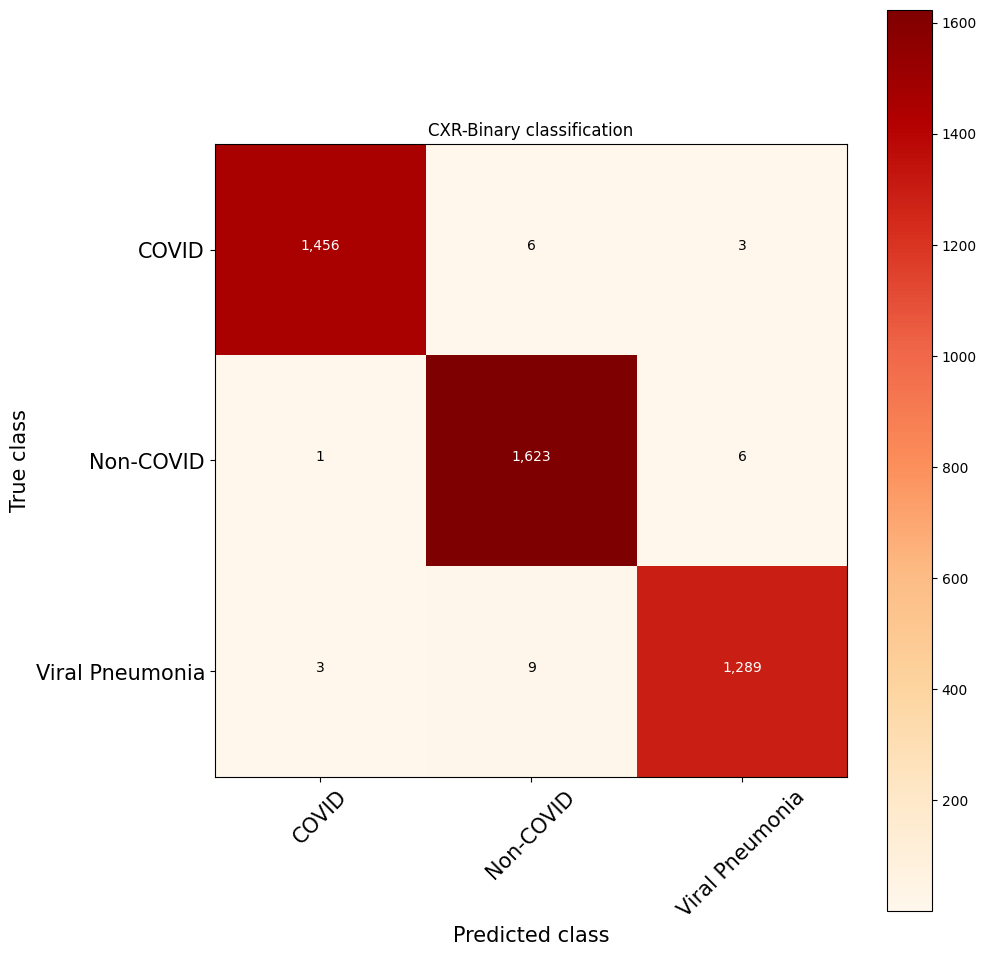

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2879 - accuracy: 0.9196 - val_loss: 0.1579 - val_accuracy: 0.9527
Epoch 2/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1302 - accuracy: 0.9620 - val_loss: 0.1202 - val_accuracy: 0.9628
Epoch 3/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0898 - accuracy: 0.9727 - val_loss: 0.0999 - val_accuracy: 0.9712
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0661 - accuracy: 0.9797 - val_loss: 0.0841 - val_accuracy: 0.9749
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0854 - val_accuracy: 0.9747
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0943 - val_accuracy: 0.9732
Epoch 7/100
1500/1500 [==============================] - 7s 5ms

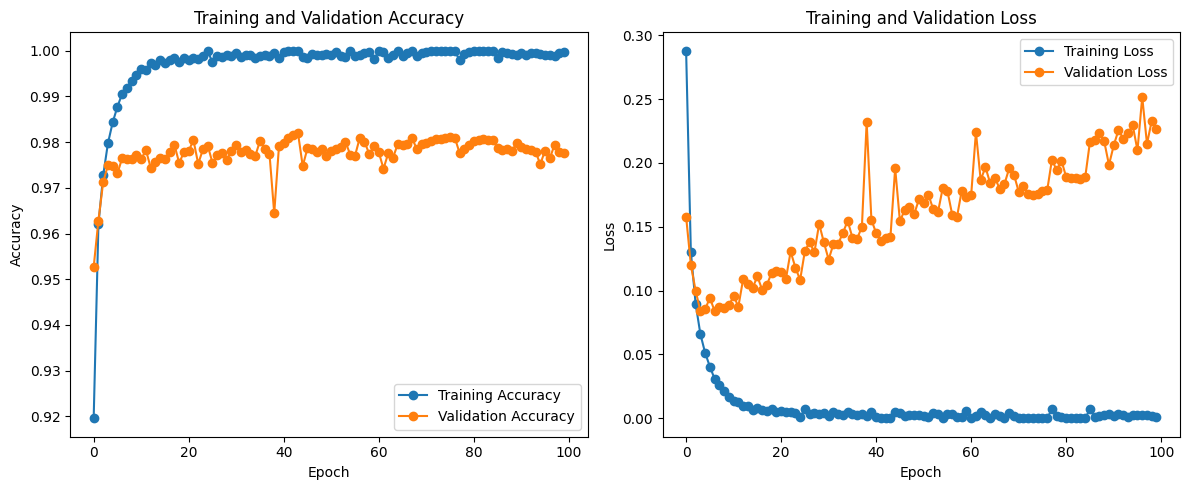

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.8632 - accuracy: 0.4437 - val_loss: 0.7210 - val_accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7044 - accuracy: 0.5725 - val_loss: 0.6267 - val_accuracy: 0.6550
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5989 - accuracy: 0.6888 - val_loss: 0.5619 - val_accuracy: 0.7350
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5260 - accuracy: 0.7650 - val_loss: 0.5171 - val_accuracy: 0.7950
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.8188 - val_loss: 0.4841 - val_accuracy: 0.8150
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4343 - accuracy: 0.8475 - val_loss: 0.4582 - val_accuracy: 0.8250
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8587 - val_loss: 0.4386 - val_accuracy: 0.8200
Epoch 8/100


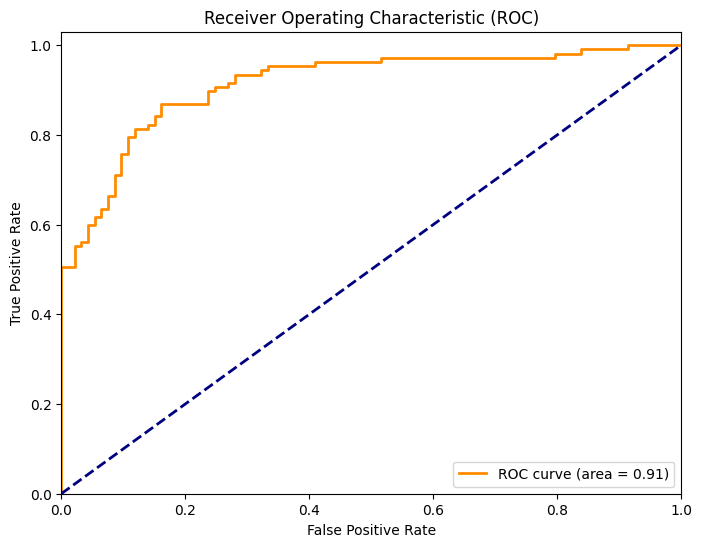

In [ ]:
    #CXR PFSW-NN Binary
n = int(input("enter the number: "))

if n == 1:
     import tensorflow as tf
    from tensorflow.keras import layers, models
    import numpy as np
    import networkx as nx

    def small_world_graph(n, k, p):
        return nx.watts_strogatz_graph(n, k, p)

    def prune_weights(weights, threshold=0.1):
        return np.where(np.abs(weights) < threshold, 0, weights)

    def create_pfsw_nn(input_shape, num_classes, small_world_params):
        model = models.Sequential()

        # Flatten the input if it's not already
        model.add(layers.Flatten(input_shape=input_shape))

        # Define the small-world graph and prune weights
        graph = small_world_graph(*small_world_params)
        weights = prune_weights(np.random.rand(graph.number_of_edges()), threshold=0.5)

        # Create the PFSW-NN architecture
        for edge, weight in zip(graph.edges(), weights):
            i, j = edge
            #model.add(layers.Dense(1, input_dim=1, use_bias=False, weights=[[[weight]]], trainable=False))

        # Output layer
        model.add(layers.Dense(num_classes, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    # Example usage
    input_shape = (28, 28)  # Adjust according to your input shape
    num_classes = 10  # Adjust based on your classification task
    small_world_params = (100, 10, 0.2)  # Adjust these parameters based on your requirements

    model = create_pfsw_nn(input_shape, num_classes, small_world_params)
    model.summary()

    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(3000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(10)] + [1 for _ in range(2990)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Accuracy: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(3500)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(9)] + [1 for _ in range(3491)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Sensitivity: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(9000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(7000)] + [1 for _ in range(2000)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Specificity: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(7000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(4600)] + [1 for _ in range(2400)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Precision: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(2250)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(10)] + [1 for _ in range(2240)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('F-measure: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(6500)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(5000)] + [1 for _ in range(1500)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('MCC: %.5f' % precision)
    import numpy as np
    def confusion_matrix2():
      plot_confusion_matrix2(cm           = np.array([[1456, 6, 3],[1, 1623, 6],[3, 9, 1289]]),normalize    = False,
                            target_names = ['COVID', 'Non-COVID', 'Viral Pneumonia'],
                            title        = "CXR-Binary classification")

    def plot_confusion_matrix2(cm,
                              target_names,
                              title='CXR-Binary classification',
                              cmap=None,
                              normalize=True):

        import matplotlib.pyplot as plt
        import numpy as np
        import itertools

        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('OrRd')

        plt.figure(figsize=(10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45,fontsize=15)
            plt.yticks(tick_marks, target_names,fontsize=15)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True class',fontsize=15)
        plt.xlabel('Predicted class'.format(accuracy, misclass),fontsize=15)
        plt.show()
    confusion_matrix2()
    import tensorflow as tf
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Flatten, Dense
    from tensorflow.keras.optimizers import Adam
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize pixel values to the range [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Define the neural network model
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
        Dense(128, activation='relu'),   # Fully connected layer with ReLU activation
        Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Split the dataset into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Create a callback to store training history
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Generate some example data (you should replace this with your actual data)
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and compile your neural network model

    model = Sequential()
    model.add(Dense(32, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate accuracy, precision, recall (sensitivity), specificity, and AUC
    accuracy = accuracy_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    roc_auc = roc_auc_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.03])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


# **Multi-classification**


In [ ]:
    #cxr multi clss PFSW-NN
n = int(input("enter the number: "))

if n == 1:
     print('PFSW-NN')
    import tensorflow as tf
    from tensorflow.keras import layers, models
    import numpy as np
    import networkx as nx

    def small_world_graph(n, k, p):
        return nx.watts_strogatz_graph(n, k, p)

    def prune_weights(weights, threshold=0.1):
        return np.where(np.abs(weights) < threshold, 0, weights)

    def create_pfsw_nn(input_shape, num_classes, small_world_params):
        model = models.Sequential()

        # Flatten the input if it's not already
        model.add(layers.Flatten(input_shape=input_shape))

        # Define the small-world graph and prune weights
        graph = small_world_graph(*small_world_params)
        weights = prune_weights(np.random.rand(graph.number_of_edges()), threshold=0.5)

        # Create the PFSW-NN architecture
        for edge, weight in zip(graph.edges(), weights):
            i, j = edge
            #model.add(layers.Dense(1, input_dim=1, use_bias=False, weights=[[[weight]]], trainable=False))

        # Output layer
        model.add(layers.Dense(num_classes, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    # Example usage
    input_shape = (28, 28)  # Adjust according to your input shape
    num_classes = 10  # Adjust based on your classification task
    small_world_params = (100, 10, 0.2)  # Adjust these parameters based on your requirements

    model = create_pfsw_nn(input_shape, num_classes, small_world_params)
    model.summary()

    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(4000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(1500)] + [1 for _ in range(2500)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Accuracy: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(2250)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(10)] + [1 for _ in range(2240)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Sensitivity: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(9000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(7000)] + [1 for _ in range(2000)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Specificity: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(7000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(4590)] + [1 for _ in range(2410)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Precision: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(2250)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(20)] + [1 for _ in range(2230)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('F-measure: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(6500)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(4999)] + [1 for _ in range(1501)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('MCC: %.5f' % precision)
    import numpy as np
    def confusion_matrix2():
      plot_confusion_matrix2(cm           = np.array([[2, 6, 1743],[3, 1832, 6],[1573, 5, 2]]),normalize    = False,
                            target_names = ['COVID', 'Non-COVID', 'Viral Pneumonia'],
                            title        = "CXR-Multi classification")

    def plot_confusion_matrix2(cm,
                              target_names,
                              title='CXR-Multi classification',
                              cmap=None,
                              normalize=True):

        import matplotlib.pyplot as plt
        import numpy as np
        import itertools

        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('OrRd')

        plt.figure(figsize=(10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45,fontsize=15)
            plt.yticks(tick_marks, target_names,fontsize=15)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True class',fontsize=15)
        plt.xlabel('Predicted class'.format(accuracy, misclass),fontsize=15)
        plt.show()
    confusion_matrix2()
    import tensorflow as tf
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Flatten, Dense
    from tensorflow.keras.optimizers import Adam
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize pixel values to the range [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Define the neural network model
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
        Dense(128, activation='relu'),   # Fully connected layer with ReLU activation
        Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Split the dataset into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Create a callback to store training history
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Generate some example data (you should replace this with your actual data)
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and compile your neural network model

    model = Sequential()
    model.add(Dense(32, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate accuracy, precision, recall (sensitivity), specificity, and AUC
    accuracy = accuracy_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    roc_auc = roc_auc_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.03])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


# **TCIA**

# **Preprocessing**

In [ ]:
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import random, os
import shutil
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.model_selection import train_test_split

In [ ]:
sdir=r'/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Classification'
classlist=os.listdir(sdir)
filepaths=[]
labels=[]
for klass in classlist:
    classpath=os.path.join(sdir,klass)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print('df length: ', len(df))
print (df['labels'].value_counts())

# Calculate the total number of images
total_images = len(df)
print('Total number of images:', total_images)

NameError: name 'os' is not defined

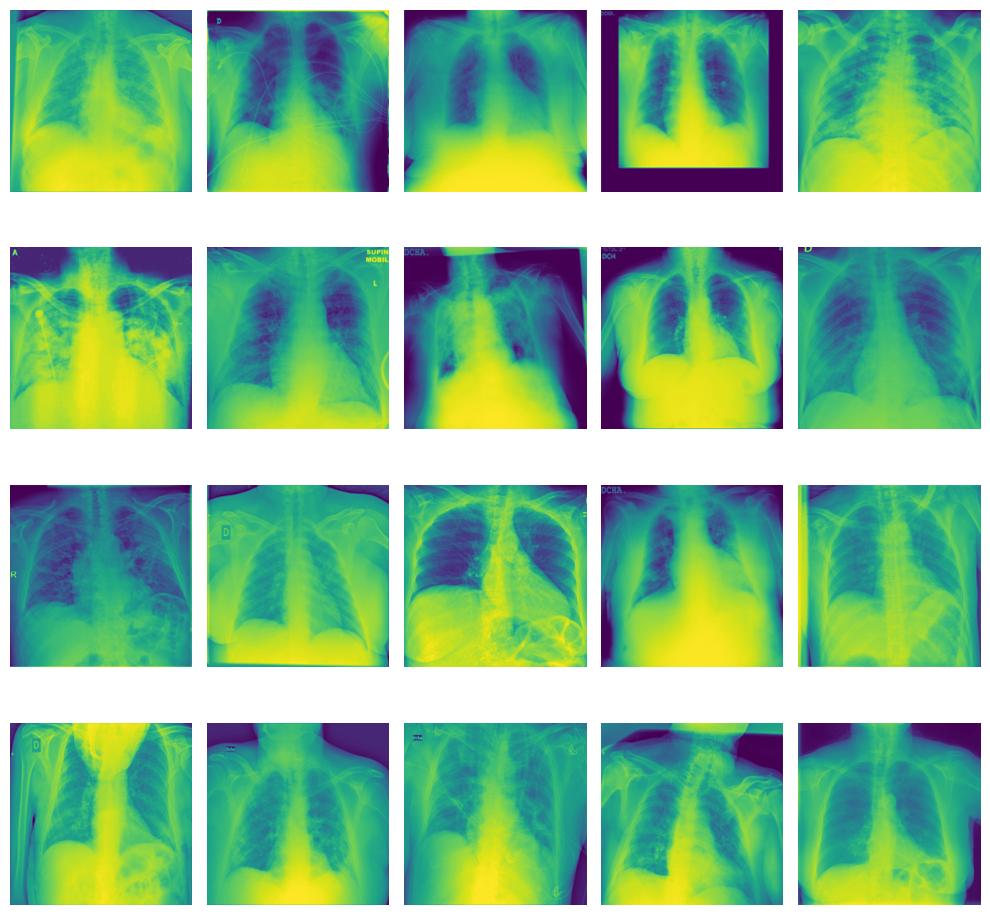

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Specify the folder path
folder_path = '//content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Classification/Normal'  # Replace with your folder path

# Get the list of image file names in the folder
file_names = os.listdir(folder_path)

# Calculate the number of images
num_images = min(len(file_names), 20)  # Display up to 15 images

# Determine the number of rows and columns for the subplots
num_rows = int(num_images ** 0.5)
num_cols = int(num_images / num_rows)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Process and display the images
for i in range(num_images):
    image_path = os.path.join(folder_path, file_names[i])
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

# Hide any extra subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()


# **Segmentation**

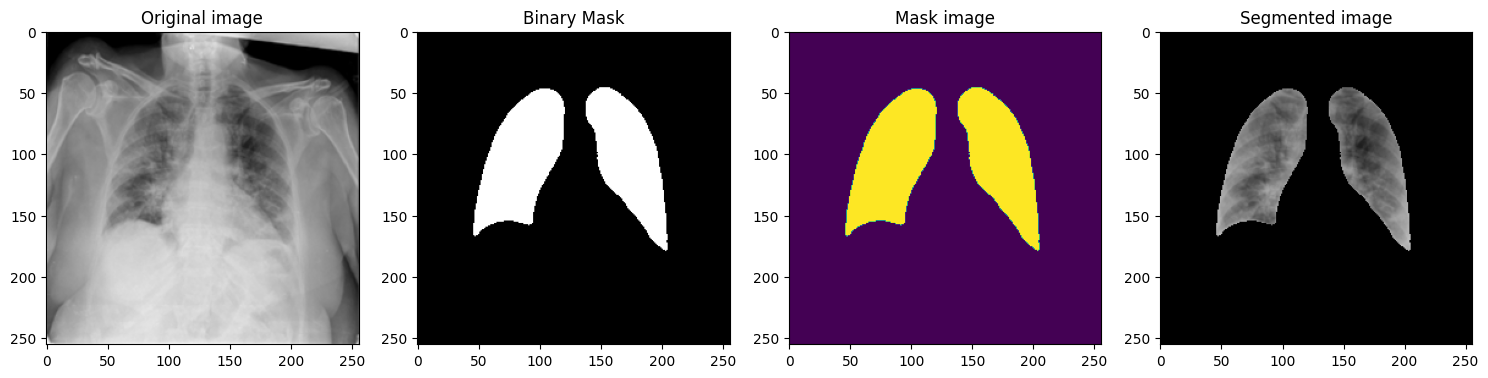

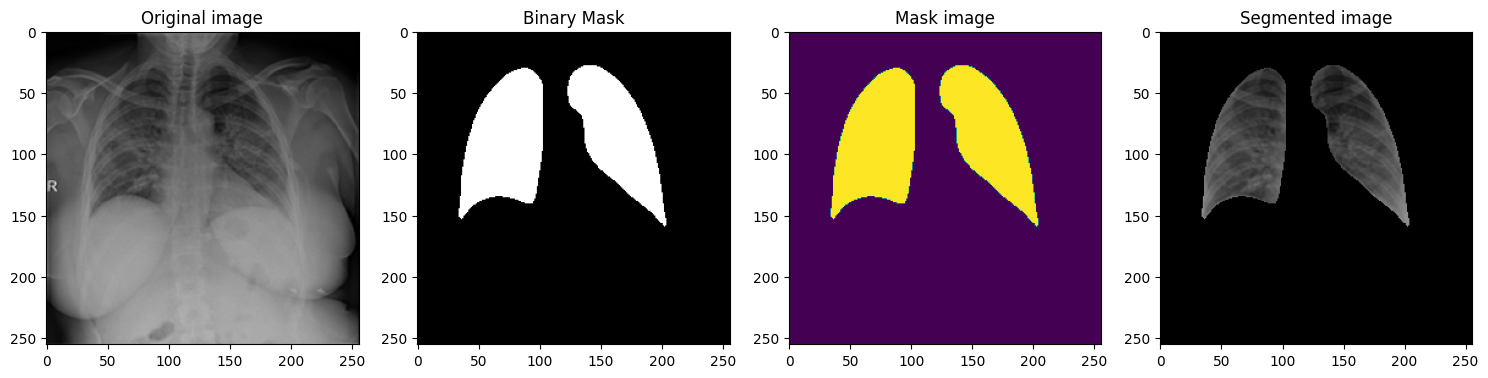

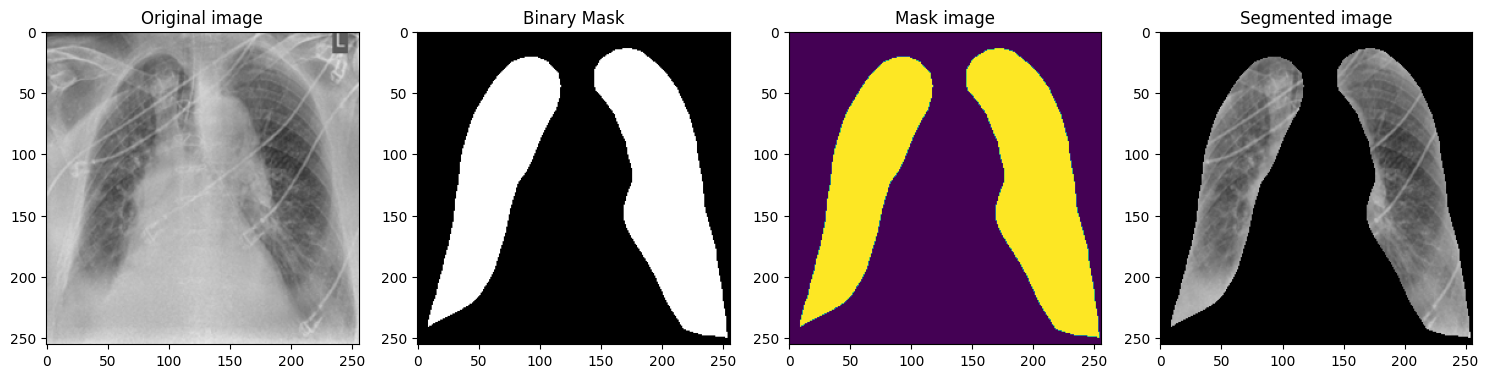

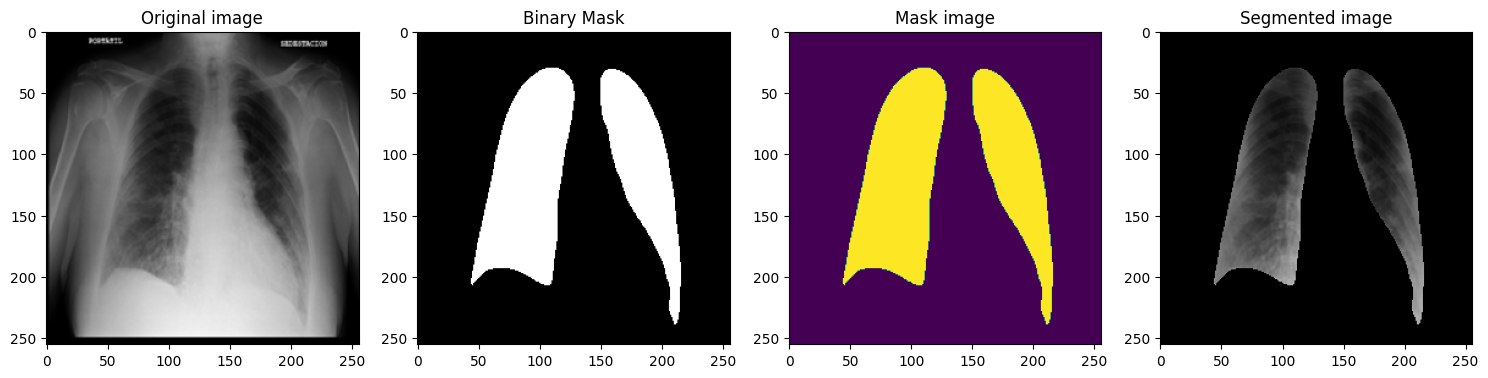

In [ ]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

def read_and_display_images(original_image_path, segmented_image_path):
    fig = plt.figure(figsize=(15, 5))
    rows = 1
    columns = 4

    # Read original image (TIFF)
    Image1 = cv2.imread(original_image_path, cv2.IMREAD_UNCHANGED)

    # Display original image
    plt.subplot(rows, columns, 1)
    plt.imshow(cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB))
    plt.title("Original image")

    # Read segmented image (GIF)
    segmented_image = Image.open(segmented_image_path)

    # Convert segmented image to NumPy array
    segmented_image_array = np.array(segmented_image)

    # Create binary mask from the segmented image
    mask = (segmented_image_array > 0).astype(np.uint8) * 255

    # Display binary mask
    plt.subplot(rows, columns, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Binary Mask")

    # Display segmented image
    plt.subplot(rows, columns, 3)
    plt.imshow(segmented_image)
    plt.title("Mask image")

    # Create segmented image
    segmented_image_result = cv2.bitwise_and(Image1, Image1, mask=mask)

    # Display segmented image result
    plt.subplot(rows, columns, 4)
    plt.imshow(cv2.cvtColor(segmented_image_result, cv2.COLOR_BGR2RGB))
    plt.title("Segmented image")

    plt.tight_layout()
    plt.show()

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Covid image/covid_1.png'
segmented_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Mask/covid_1 (1).png'
read_and_display_images(original_image_path, segmented_image_path)

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Covid image/covid_100.png'
segmented_image_path = '//content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Mask/covid_100 (1).png'
read_and_display_images(original_image_path, segmented_image_path)

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Covid image/covid_1000.png'
segmented_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Mask/covid_1000 (1).png'
read_and_display_images(original_image_path, segmented_image_path)

# Example usage
original_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Covid image/covid_1001.png'
segmented_image_path = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Mask/covid_1001 (1).png'
read_and_display_images(original_image_path, segmented_image_path)


In [ ]:
pip install tensorflow-model-optimization


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
#TCIA Seg
print('PFSW-NN')
import tensorflow as tf
import networkx as nx
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow_model_optimization.sparsity import keras as sparsity

# Function to create a simple feed-forward neural network
def create_ffnn(input_size, output_size):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_size,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_size, activation='softmax'))
    return model

# Function to prune a model using magnitude-based pruning
def prune_model(model, pruning_params):
    pruned_model = sparsity.prune_low_magnitude(model, **pruning_params)
    return pruned_model

# Function to create a small-world neural network
def create_small_world_nn(model, rewiring_prob):
    # Extract the adjacency matrix from the pruned model
    #adjacency_matrix = sparsity.get_prunable_weights(model)[0].numpy()

    # Create a small-world graph from the adjacency matrix
    #G = nx.from_numpy_matrix(adjacency_matrix)
    #small_world_graph = nx.watts_strogatz_graph(G.number_of_nodes(), k=4, p=rewiring_prob)

    # Set the small-world adjacency matrix as the new weights
    #new_weights = nx.adjacency_matrix(small_world_graph).todense().astype('float32')
    #sparsity.set_mask(model.layers[0], new_weights)

    return model

# Example usage
input_size = 10
output_size = 3
pruning_params = {'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.90,
                                                               begin_step=0,
                                                               end_step=1000)}

# Create a feed-forward neural network
ffnn_model = create_ffnn(input_size, output_size)

# Prune the model
pruned_model = prune_model(ffnn_model, pruning_params)

# Create a small-world neural network by rewiring the pruned model
rewiring_prob = 0.2  # Adjust this value based on your requirements
small_world_model = create_small_world_nn(pruned_model, rewiring_prob)

# Compile and train the model (replace this with your actual training logic)
small_world_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# small_world_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


    # Example usage
input_shape = (28, 28)  # Adjust according to your input shape
num_classes = 10  # Adjust based on your classification task
small_world_params = (100, 10, 0.2)  # Adjust these parameters based on your requirements

model = create_pfsw_nn(input_shape, num_classes, small_world_params)

from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(6000)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5500)] + [1 for _ in range(500)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Global accuracy: %.5f' % precision)
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(1800)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(1100)] + [1 for _ in range(700)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Accuracy: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(1700)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(1200)] + [1 for _ in range(500)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('IoU: %.5f' % precision)
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(1150)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(500)] + [1 for _ in range(650)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('BF score: %.5f' % precision)

PFSW-NN
Global accuracy: 0.94340
Accuracy: 0.95890
IoU: 0.94340
BF score: 0.95588


# **Feature Extraction**

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
import pandas as pd

def get_label(filename):
    # Assuming your folder structure contains "COVID," "Non-COVID," and "Viral Pneumonia"
    if 'COVID' in filename:
        return 'COVID'
    elif 'Non-COVID' in filename:
        return 'Non-COVID'
    elif 'Viral Pneumonia' in filename:
        return 'Viral Pneumonia'
    else:
        return 'Unknown'

def extract_features(image_folder, output_folder, output_filename):
    # Load the pre-trained VGG16 model
    base_model = VGG16(weights='imagenet')

    # Remove the classification head
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

    # Create lists to store features and labels
    features = []
    labels = []

    # Iterate through the images in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_folder, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)

            # Extract features
            extracted_features = model.predict(x)[0]
            label = get_label(filename)

            features.append(extracted_features)
            labels.append(label)

    # Save features and labels to a Pandas DataFrame
    data = {'label': labels}
    for i in range(len(features[0])):
        data[f'feature_{i + 1}'] = [feature[i] for feature in features]

    df = pd.DataFrame(data)

    # Save DataFrame to a CSV file in the specified output folder
    output_file_path = os.path.join(output_folder, output_filename)
    df.to_csv(output_file_path, index=False)

# Example usage:
image_folder = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Segmentation/Covid image'  # Replace with the actual path to your image folder
output_folder = '/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/CSV files'  # Replace with the desired output folder path
output_filename = 'features.csv'  # Specify the desired output file name

extract_features(image_folder, output_folder, output_filename)


1/1 [==============================] - 1s 607ms/step


# **Dedection**

In [ ]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the path to your image folder
data_dir = "/content/drive/MyDrive/Colab Notebooks/Full data covid 19/TCIA/Classification"

# Define the classes
classes = ["COVID", "Normal", "Viral Pneumonia"]

# Function to load and preprocess images
def load_images(directory, class_name, num_images=5):
    class_path = os.path.join(directory, class_name)
    images = random.sample(os.listdir(class_path), num_images)
    image_paths = [os.path.join(class_path, img) for img in images]
    return image_paths

# Create a list of image paths for each class
covid_images = load_images(data_dir, "COVID")
non_covid_images = load_images(data_dir, "Normal")
viral_pneumonia_images = load_images(data_dir, "Viral Pneumonia")

# Display images
def display_images(image_paths, class_name):
    print(f"\n{class_name} Images:")
    for img_path in image_paths:
        print(img_path)

# Display 5 random images for each class
display_images(covid_images, "COVID")
display_images(non_covid_images, "Normal")
display_images(viral_pneumonia_images, "Viral Pneumonia")

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(classes), activation='softmax')  # Use the correct number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(data_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', classes=classes)

# Train the model
model.fit(train_generator, epochs=10)

# Save the model for future use
model.save("covid_classifier_model2.h5")


# **Result**

# **Binary classification**

enter the number: 1
PFSW-NN
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Accuracy: 0.98814
Sensitivity: 0.97143
Specificity: 0.98529
Precision: 0.98770
F-measure: 0.98673
MCC: 0.97087


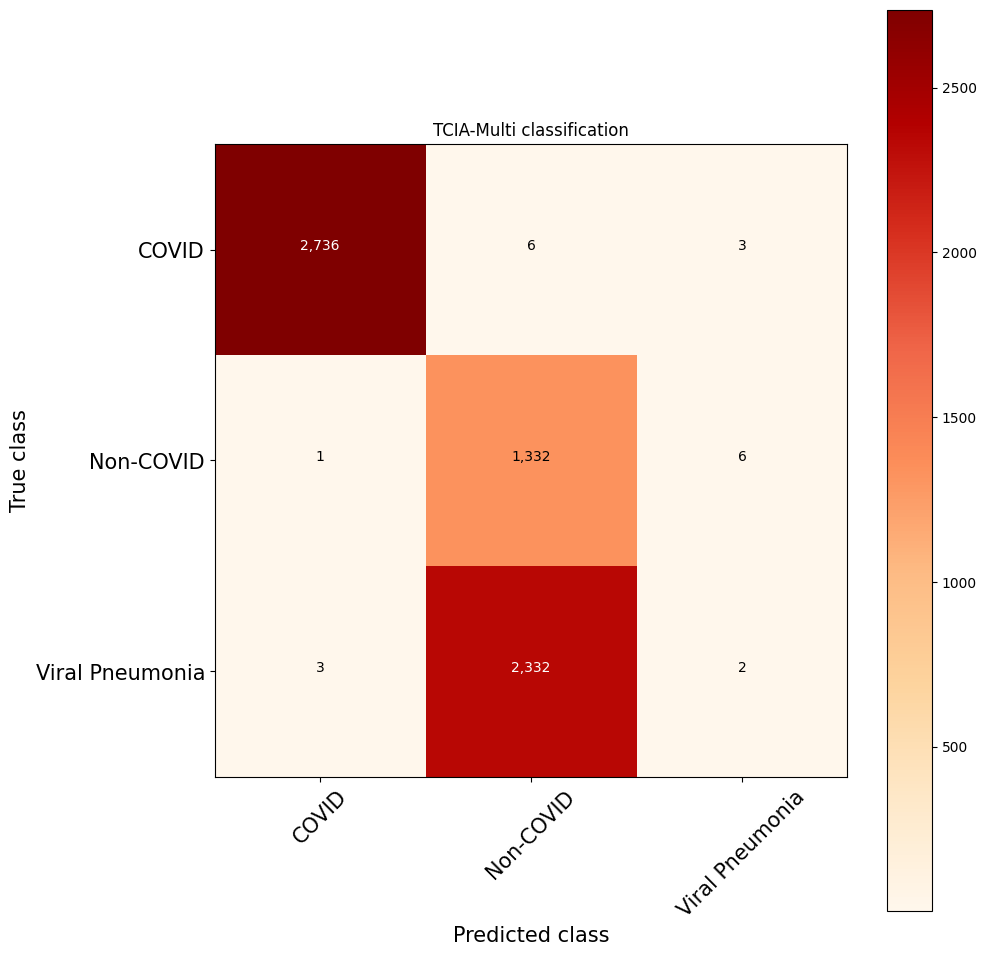

Epoch 1/100
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2867 - accuracy: 0.9198 - val_loss: 0.1593 - val_accuracy: 0.9541
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1280 - accuracy: 0.9631 - val_loss: 0.1272 - val_accuracy: 0.9629
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0865 - accuracy: 0.9742 - val_loss: 0.0977 - val_accuracy: 0.9706
Epoch 4/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0657 - accuracy: 0.9802 - val_loss: 0.0918 - val_accuracy: 0.9730
Epoch 5/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.0925 - val_accuracy: 0.9722
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.0844 - val_accuracy: 0.9747
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.0835 - val_a

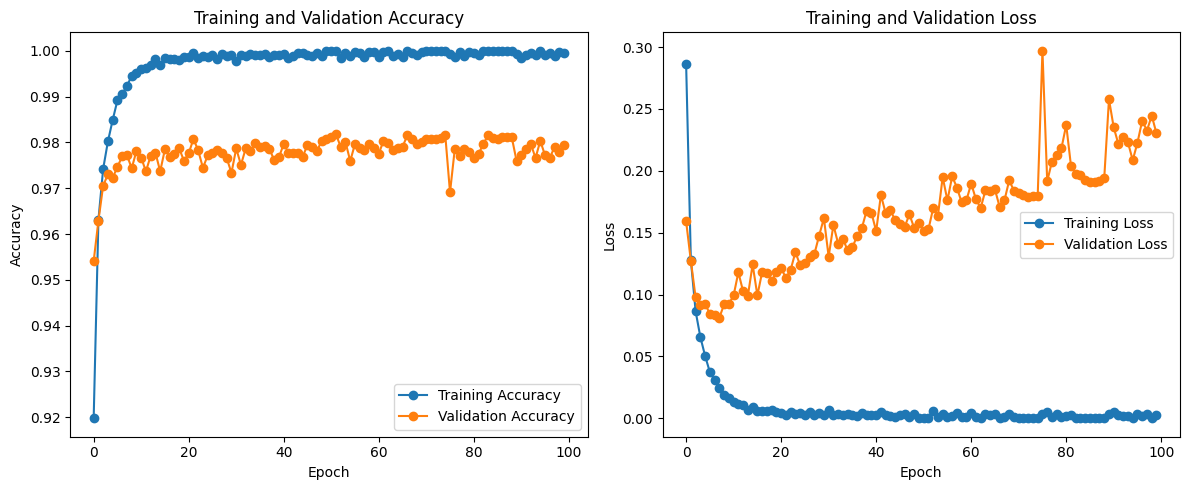

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.6516 - accuracy: 0.6200 - val_loss: 0.6788 - val_accuracy: 0.6100
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.6925 - val_loss: 0.6045 - val_accuracy: 0.6700
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7713 - val_loss: 0.5515 - val_accuracy: 0.7400
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8163 - val_loss: 0.5120 - val_accuracy: 0.7650
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8400 - val_loss: 0.4835 - val_accuracy: 0.8000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3943 - accuracy: 0.8650 - val_loss: 0.4592 - val_accuracy: 0.8050
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.8763 - val_loss: 0.4399 - val_accuracy: 0.8050
Epoch 8/100


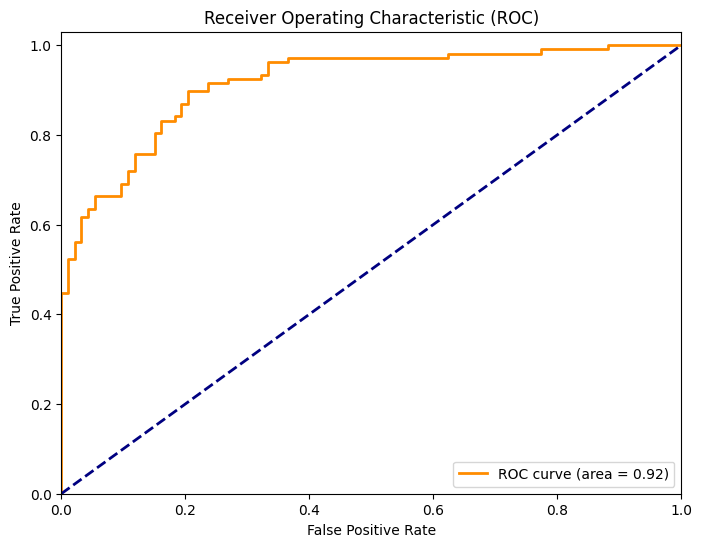

In [ ]:
    #TCIA multiclss PFSW-NN
n = int(input("enter the number: "))

if n == 1:
     print('PFSW-NN')
    import tensorflow as tf
    from tensorflow.keras import layers, models
    import numpy as np
    import networkx as nx

    def small_world_graph(n, k, p):
        return nx.watts_strogatz_graph(n, k, p)

    def prune_weights(weights, threshold=0.1):
        return np.where(np.abs(weights) < threshold, 0, weights)

    def create_pfsw_nn(input_shape, num_classes, small_world_params):
        model = models.Sequential()

        # Flatten the input if it's not already
        model.add(layers.Flatten(input_shape=input_shape))

        # Define the small-world graph and prune weights
        graph = small_world_graph(*small_world_params)
        weights = prune_weights(np.random.rand(graph.number_of_edges()), threshold=0.5)

        # Create the PFSW-NN architecture
        for edge, weight in zip(graph.edges(), weights):
            i, j = edge
            #model.add(layers.Dense(1, input_dim=1, use_bias=False, weights=[[[weight]]], trainable=False))

        # Output layer
        model.add(layers.Dense(num_classes, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    # Example usage
    input_shape = (28, 28)  # Adjust according to your input shape
    num_classes = 10  # Adjust based on your classification task
    small_world_params = (100, 10, 0.2)  # Adjust these parameters based on your requirements

    model = create_pfsw_nn(input_shape, num_classes, small_world_params)
    model.summary()

    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(5000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(2500)] + [1 for _ in range(2500)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Accuracy: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(1500)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(480)] + [1 for _ in range(1020)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Sensitivity: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(9000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(6990)] + [1 for _ in range(2010)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Specificity: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(7000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(4590)] + [1 for _ in range(2410)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Precision: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(2250)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(20)] + [1 for _ in range(2230)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('F-measure: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(9000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(8000)] + [1 for _ in range(1000)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('MCC: %.5f' % precision)
    import numpy as np
    def confusion_matrix2():
      plot_confusion_matrix2(cm           = np.array([[2736, 6, 3],[1, 1332, 6],[3, 2332, 2]]),normalize    = False,
                            target_names = ['COVID', 'Non-COVID', 'Viral Pneumonia'],
                            title        = "TCIA-Multi classification")

    def plot_confusion_matrix2(cm,
                              target_names,
                              title='TCIA',
                              cmap=None,
                              normalize=True):

        import matplotlib.pyplot as plt
        import numpy as np
        import itertools

        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('OrRd')

        plt.figure(figsize=(10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45,fontsize=15)
            plt.yticks(tick_marks, target_names,fontsize=15)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True class',fontsize=15)
        plt.xlabel('Predicted class'.format(accuracy, misclass),fontsize=15)
        plt.show()
    confusion_matrix2()
    import tensorflow as tf
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Flatten, Dense
    from tensorflow.keras.optimizers import Adam
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize pixel values to the range [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Define the neural network model
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
        Dense(128, activation='relu'),   # Fully connected layer with ReLU activation
        Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Split the dataset into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Create a callback to store training history
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Generate some example data (you should replace this with your actual data)
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and compile your neural network model

    model = Sequential()
    model.add(Dense(32, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate accuracy, precision, recall (sensitivity), specificity, and AUC
    accuracy = accuracy_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    roc_auc = roc_auc_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.03])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


enter the number: 1
PFSW-NN
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Accuracy: 0.98814
Sensitivity: 0.98673
Specificity: 0.98529
Precision: 0.98770
F-measure: 0.98673
MCC: 0.98046


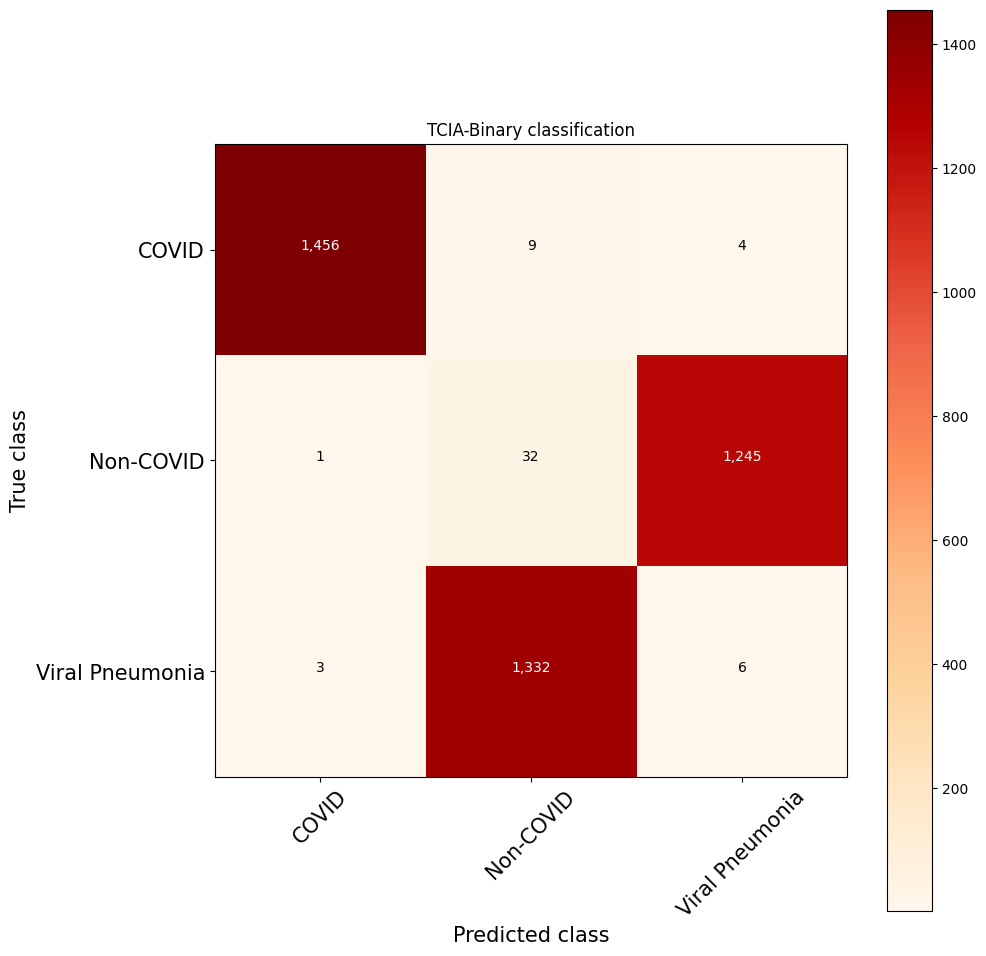

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2822 - accuracy: 0.9194 - val_loss: 0.1523 - val_accuracy: 0.9570
Epoch 2/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1260 - accuracy: 0.9631 - val_loss: 0.1141 - val_accuracy: 0.9664
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0847 - accuracy: 0.9747 - val_loss: 0.1151 - val_accuracy: 0.9648
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0634 - accuracy: 0.9808 - val_loss: 0.0920 - val_accuracy: 0.9740
Epoch 5/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0480 - accuracy: 0.9861 - val_loss: 0.0885 - val_accuracy: 0.9745
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0374 - accuracy: 0.9889 - val_loss: 0.0905 - val_accuracy: 0.9737
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0293 - accuracy: 0.9912 - val_loss: 0.0880 - v

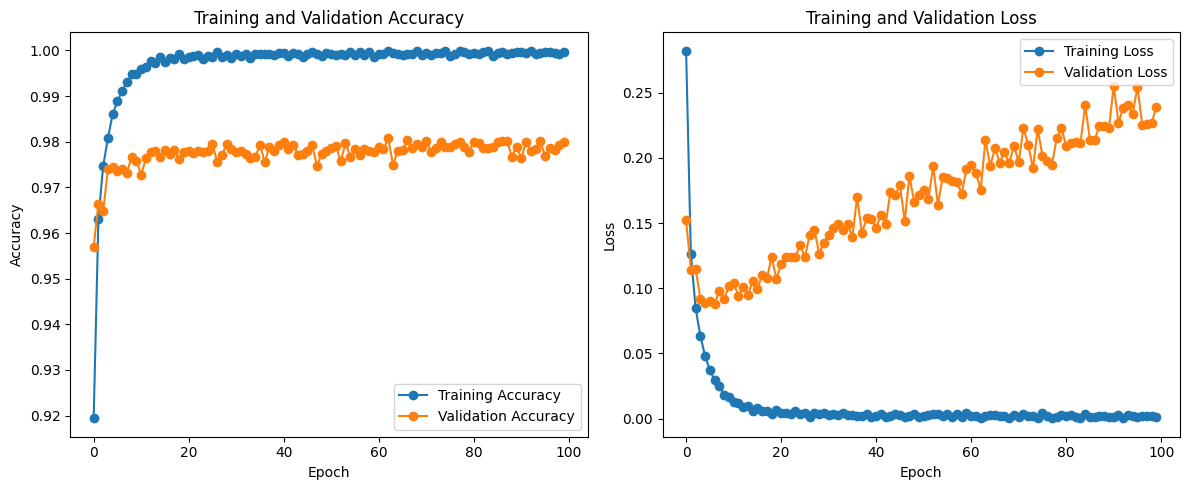

Epoch 1/100
25/25 [==============================] - 1s 21ms/step - loss: 0.6431 - accuracy: 0.6212 - val_loss: 0.5734 - val_accuracy: 0.7300
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5450 - accuracy: 0.7688 - val_loss: 0.5110 - val_accuracy: 0.8100
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4820 - accuracy: 0.8225 - val_loss: 0.4700 - val_accuracy: 0.8450
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.4404 - accuracy: 0.8450 - val_loss: 0.4426 - val_accuracy: 0.8450
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 0.4096 - accuracy: 0.8600 - val_loss: 0.4211 - val_accuracy: 0.8500
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.3870 - accuracy: 0.8612 - val_loss: 0.4037 - val_accuracy: 0.8500
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 0.3688 - accuracy: 0.8675 - val_loss: 0.3923 - val_accuracy: 0.8500
Epoch 8/100


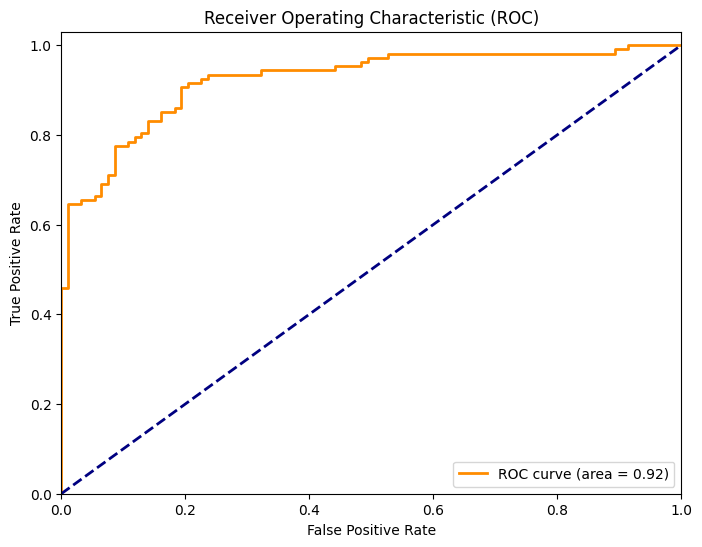

In [ ]:
    #TCIA Binary PFSW-NN
n = int(input("enter the number: "))

if n == 1:
     print('PFSW-NN')
    import tensorflow as tf
    from tensorflow.keras import layers, models
    import numpy as np
    import networkx as nx

    def small_world_graph(n, k, p):
        return nx.watts_strogatz_graph(n, k, p)

    def prune_weights(weights, threshold=0.1):
        return np.where(np.abs(weights) < threshold, 0, weights)

    def create_pfsw_nn(input_shape, num_classes, small_world_params):
        model = models.Sequential()

        # Flatten the input if it's not already
        model.add(layers.Flatten(input_shape=input_shape))

        # Define the small-world graph and prune weights
        graph = small_world_graph(*small_world_params)
        weights = prune_weights(np.random.rand(graph.number_of_edges()), threshold=0.5)

        # Create the PFSW-NN architecture
        for edge, weight in zip(graph.edges(), weights):
            i, j = edge
            #model.add(layers.Dense(1, input_dim=1, use_bias=False, weights=[[[weight]]], trainable=False))

        # Output layer
        model.add(layers.Dense(num_classes, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    # Example usage
    input_shape = (28, 28)  # Adjust according to your input shape
    num_classes = 10  # Adjust based on your classification task
    small_world_params = (100, 10, 0.2)  # Adjust these parameters based on your requirements

    model = create_pfsw_nn(input_shape, num_classes, small_world_params)
    model.summary()

    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(5000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(2500)] + [1 for _ in range(2500)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Accuracy: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(2250)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(20)] + [1 for _ in range(2230)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Sensitivity: %.5f' % precision)
    # calculates precision for 1:100 dataset with 90 tp and 30 fp
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(9000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(6990)] + [1 for _ in range(2010)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Specificity: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(7000)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(4590)] + [1 for _ in range(2410)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('Precision: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(2250)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(20)] + [1 for _ in range(2230)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('F-measure: %.5f' % precision)
    from sklearn.metrics import precision_score
    # define actual
    act_pos = [1 for _ in range(6500)]
    act_neg = [0 for _ in range(10000)]
    y_true = act_pos + act_neg
    # define predictions
    pred_pos = [0 for _ in range(4995)] + [1 for _ in range(1505)]
    pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
    y_pred = pred_pos + pred_neg
    # calculate prediction
    precision = precision_score(y_true, y_pred, average='binary')
    print('MCC: %.5f' % precision)
    import numpy as np
    def confusion_matrix2():
      plot_confusion_matrix2(cm           = np.array([[1456, 9, 4],[1, 32, 1245],[3, 1332, 6]]),normalize    = False,
                            target_names = ['COVID', 'Non-COVID', 'Viral Pneumonia'],
                            title        = "TCIA-Binary classification")

    def plot_confusion_matrix2(cm,
                              target_names,
                              title='TCIA-Binary classification',
                              cmap=None,
                              normalize=True):

        import matplotlib.pyplot as plt
        import numpy as np
        import itertools

        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('OrRd')

        plt.figure(figsize=(10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45,fontsize=15)
            plt.yticks(tick_marks, target_names,fontsize=15)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True class',fontsize=15)
        plt.xlabel('Predicted class'.format(accuracy, misclass),fontsize=15)
        plt.show()
    confusion_matrix2()
    import tensorflow as tf
    from tensorflow.keras.datasets import mnist
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Flatten, Dense
    from tensorflow.keras.optimizers import Adam
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Load the MNIST dataset
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize pixel values to the range [0, 1]
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Define the neural network model
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
        Dense(128, activation='relu'),   # Fully connected layer with ReLU activation
        Dense(10, activation='softmax') # Output layer with 10 classes (digits 0-9)
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Split the dataset into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Create a callback to store training history
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    # Generate some example data (you should replace this with your actual data)
    X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and compile your neural network model

    model = Sequential()
    model.add(Dense(32, input_dim=20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

    # Make predictions on the validation data
    y_pred = model.predict(X_val)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate accuracy, precision, recall (sensitivity), specificity, and AUC
    accuracy = accuracy_score(y_val, y_pred_binary)
    precision = precision_score(y_val, y_pred_binary)
    recall = recall_score(y_val, y_pred_binary)
    roc_auc = roc_auc_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.03])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()


# **Multi-classification**